In [51]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,language,proj_id,file_id,file_body
0,JavaScript,10001,100001,// Functions as values of a variable\nvar cube...
1,JavaScript,10001,100002,// Functions as values of a variable\nvar cube...
2,JavaScript,10002,100003,function median(ary) {\n if (ary.length == ...
3,JavaScript,10002,100004,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n"
4,JavaScript,10002,100005,(() => {\n 'use strict';\n\n // median :...


In [52]:
df.language.value_counts()

Python         1452
Haskell        1333
Perl           1136
Ruby           1104
JavaScript     1104
C              1078
Go              998
Java            987
Mathematica     927
C++             880
Scala           802
Fortran         745
Kotlin          643
Julia           638
R               603
MATLAB          544
PHP             477
Rust            417
Swift           404
Name: language, dtype: int64

In [53]:
df.head()
df = df.drop(['proj_id', 'file_id'], axis=1)

In [54]:
df ["lang_id"] = df['language'].factorize()[0]
lang_id_df = df[['language', 'lang_id']].drop_duplicates().sort_values('lang_id')
lang_to_id = dict(lang_id_df.values)
id_to_lang = dict(lang_id_df[['lang_id', 'language']].values)

In [55]:
df.head()

,language,file_body,lang_id
0,JavaScript,// Functions as values of a variable\nvar cube...,0
1,JavaScript,// Functions as values of a variable\nvar cube...,0
2,JavaScript,function median(ary) {\n if (ary.length == ...,0
3,JavaScript,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n",0
4,JavaScript,(() => {\n 'use strict';\n\n // median :...,0


In [56]:
# create dataframe for each new language 
# prog_lang = dict(zip([pl for pl in df.language.unique()],[df.loc[df['language'] == pl] for pl in df.language.unique()]))

# p_languages = [df.loc[df['language'] == pl] for pl in df.language.unique()]


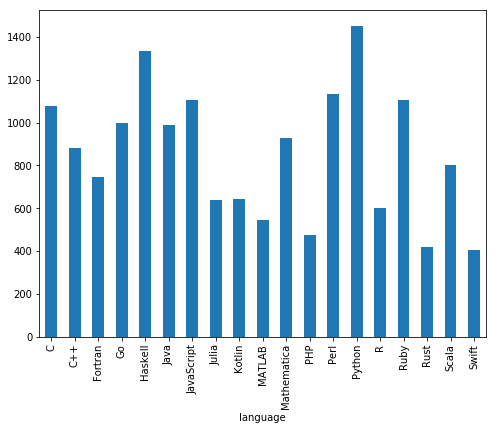

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('language').file_body.count().plot.bar(ylim=0)
plt.show()

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.file_body.values.astype('U')).toarray()
labels = df.lang_id
features.shape

(16272, 27132)

In [59]:
from sklearn.feature_selection import chi2
import numpy as np

N=10

for  language, lang_id in sorted(lang_to_id.items()):
    features_chi2 = chi2(features, labels == lang_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(language))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'C':
  . Most correlated unigrams:
. void
. int
. malloc
. char
. sizeof
. define
. stdlib
. printf
. include
. stdio
  . Most correlated bigrams:
. malloc sizeof
. main int
. main void
. stdio int
. stdlib include
. const char
. int main
. include stdlib
. stdio include
. include stdio
# 'C++':
  . Most correlated unigrams:
. auto
. begin
. template
. namespace
. boost
. include
. iostream
. endl
. cout
. std
  . Most correlated bigrams:
. using namespace
. std vector
. main std
. endl return
. iostream include
. cout std
. std string
. std endl
. include iostream
. std cout
# 'Fortran':
  . Most correlated unigrams:
. i0
. parameter
. dimension
. real
. implicit
. write
. integer
. subroutine
. intent
. program
  . Most correlated bigrams:
. end module
. end write
. character len
. end function
. integer parameter
. integer intent
. integer dimension
. end subroutine
. implicit integer
. end program
# 'Go':
  . Most correlated unigrams:
. strconv
. rune
. os
. make
. nil
. err
. fl

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


X_train, X_test, y_train, y_test = train_test_split(df['file_body'], df['language'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.astype('U'))
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
print(clf.predict(count_vect.transform([" // Higher order function var compose = (f, g) => (x => f(g(x))); // Storing functions in a array var fun = [ Math.sin, Math.cos, cube ]; var inv = [ Math.asin, Math.acos, cuberoot ]; for (var i = 0; i < 3; i++) {   // Applying the composition to 0.5  console.log(compose(inv[i], fun[i])(0.5)); // Storing functions in a array "])))

['JavaScript']


In [31]:
print(clf.predict(count_vect.transform(["""
    # Store input numbers
    num1 = input('Enter first number: ')
    num2 = input('Enter second number: ')
    # Add two numbers
    sum = float(num1) + float(num2)
    # Display the sum
    print('The sum of {0} and {1} is {2}'.format(num1, num2, sum))
    
    """])))


['Python']


In [32]:
print(clf.predict(count_vect.transform(["""
   
   #include <stdio.h> 
#include <stdlib.h> 
#include <time.h> 
  
// Generates and prints 'count' random 
// numbers in range [lower, upper]. 
void printRandoms(int lower, int upper,  
                             int count) 
{ 
    int i; 
    for (i = 0; i < count; i++) { 
        int num = (rand() % 
           (upper - lower + 1)) + lower; 
        printf("%d ", num); 
    } 
} 
  
// Driver code 
int main() 
{ 
    int lower = 5, upper = 7, count = 1; 
  
    // Use current time as  
    // seed for random generator 
    srand(time(0)); 
  
    printRandoms(lower, upper, count); 
  
    return 0; 
} 
   
   
   """])))


['C']


In [33]:
print(clf.predict(count_vect.transform(["""
   
   
   """])))

['Python']


In [34]:
print(clf.predict(count_vect.transform(["""
  #include<iostream>
#include<cstdlib>
#include
using namespace std;
main() {
   int max;
   max = 100; //set the upper bound to generate the random number
   srand(time(0));
   cout << "The random number is: "<<rand()%max;
}
   """])))

['C++']


In [35]:
print(clf.predict(count_vect.transform(["""
  /**
 * Created by Aman gautam on 25-Nov-17.
 */
fun main(args:Array<String>){
    println("Enter two values ")
    print("a = ")
    var a=readLine()!!.toDouble()
    print("b = ")
    var b=readLine()!!.toDouble()
    println("1. Addition \n2. Substraction \n3. Multiplication \n4. Divide")
    print("Enter Choice : ")
    var ch= readLine()!!.toInt()
    print("Result : ")
    when(ch){
        1 -> print("a+b = ${a+b}")
        2 -> print("a-b = ${a-b}")
        3 -> print("a*b = ${a*b}")
        4 -> print("a/b = ${a/b}")
        else -> print("Wrong Choice")
    }
}

   """])))

['Kotlin']


In [38]:
print(clf.predict(count_vect.transform(["""Live Demo
class MarksStruct {
   var mark: Int
   init(mark: Int) {
      self.mark = mark
   }
}

class studentMarks {
   var mark1 = 300
   var mark2 = 400
   var mark3 = 900
}

let marks = studentMarks()
print("Mark1 is \(marks.mark1)")
print("Mark2 is \(marks.mark2)")
print("Mark3 is \(marks.mark3)")
"""])))

['Swift']


In [40]:
print(clf.predict(count_vect.transform(["""fn main() {
    println!("Hello, world!");

    another_function();
}

fn another_function() {
    println!("Another function.");
}
"""])))

['Rust']


/Users/macbookpro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/macbookpro/anaconda3/lib/python3.7/site-package

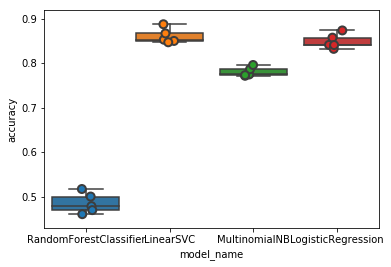

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [43]:
cv_df.head(19)

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.478541
1,RandomForestClassifier,1,0.460595
2,RandomForestClassifier,2,0.500154
3,RandomForestClassifier,3,0.469683
4,RandomForestClassifier,4,0.517103
5,LinearSVC,0,0.852544
6,LinearSVC,1,0.849739
7,LinearSVC,2,0.866667
8,LinearSVC,3,0.846722
9,LinearSVC,4,0.887211


In [45]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.860577
LogisticRegression        0.848780
MultinomialNB             0.780126
RandomForestClassifier    0.485215
Name: accuracy, dtype: float64

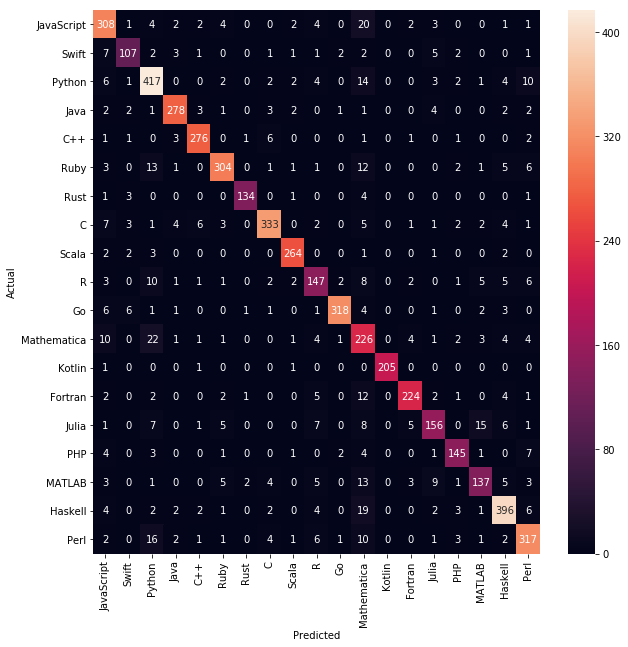

In [46]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=lang_id_df.language.values, yticklabels=lang_id_df.language.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [49]:
from IPython.display import display
for predicted in lang_id_df.lang_id:
  for actual in lang_id_df.lang_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_lang[actual], id_to_lang[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['language', 'file_body']])
      print('')

'Mathematica' predicted as 'JavaScript' : 10 examples.


,language,file_body
10204,Mathematica,"Round[ListDeconvolve[{6, -9, -7, -5}, {-48, 84..."
10538,Mathematica,"ConditionalExpression[a, False]\n->Undefined\n"
10408,Mathematica,"True\nFalse\n{6,28,496,8128}\n"
10470,Mathematica,"{6, 28, 496, 8128, 33550336}\n"
10271,Mathematica,"shE[s_String] := -Plus @@ ((# Log[2., #]) & /@..."
10719,Mathematica,"{0,1,2,2,3,4,4,5,6,6,7,7,8,9,9,10,11,11,12,12,..."
10614,Mathematica,"URLDecoding[""http%3A%2F%2Ffoo%20bar%2F""]\n"
10164,Mathematica,"Column@{ReleaseHold[\n Function[expression,\..."
9909,Mathematica,"preorder[1[2[4[7], 5], 3[6[8, 9]]]]\ninorder[1..."
10599,Mathematica,"S = 10 ; M = {{7, 11, 13}, {17 , 19, 23} , {29..."



'Ruby' predicted as 'Python' : 13 examples.


,language,file_body
5482,Ruby,"def hashJoin(table1, index1, table2, index2)\n..."
4919,Ruby,"print <<HERE\nWith an unquoted delimiter, this..."
5766,Ruby,stack = []\nstack.push(value) # pushing\nvalue...
5101,Ruby,harshad = 1.step.lazy.select { |n| n % n.digit...
4857,Ruby,p open(__FILE__).read\n
5426,Ruby,"def swap(a, b)\n return b, a\nend\n"
5494,Ruby,"#Direct positional words like top, bottom, fir..."
5160,Ruby,"print_all(4, 3, 5, 6, 4, 3)\nprint_all(4, 3, 5..."
5634,Ruby,"lucus : [2, 1, 3, 4, 7, 11, 18, 29, 47,..."
5704,Ruby,"p ""Enter a variable name""\nx = ""@"" + gets.chom..."



'R' predicted as 'Python' : 10 examples.


,language,file_body
8582,R,z1 <- 1.5 + 3i\nz2 <- 1.5 + 1.5i\nprint(z1 + z...
8409,R,"aCollie <- ""woof""\nclass(aCollie) <- c(""Collie..."
8729,R,total <- sum(1:5)\nproduct <- prod(1:5)\n
8241,R,i <- 1024L\nwhile(i > 0)\n{\n print(i)\n i...
8722,R,"env_var <- ifelse(.Platform$OS.type == ""window..."
8394,R,print(unname(x))\n
8656,R,"x <- c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)\ny <- c(2..."
8600,R,print(0^0)\n
8416,R,"> print(unname(x[""!""]))\n"
8412,R,"Sys.getenv(""PATH"")\n"



'Mathematica' predicted as 'Python' : 22 examples.


,language,file_body
10287,Mathematica,"Print[""Hello world!""]\n"
10268,Mathematica,"Module[{array = Range@9, score = 0},\n While[a..."
10022,Mathematica,"StringByteCount[""Hello world""]\n"
10558,Mathematica,"varname = InputString[""Enter a variable name""]..."
10569,Mathematica,"Print[""\007""]\n"
10089,Mathematica,"Root[A,n]\n"
10132,Mathematica,"{0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144,..."
9925,Mathematica,"StringHash[""The quick brown fox jumped over t..."
9933,Mathematica,"Print /@ {""rosettacode"", ""kitten"", ""sitting"", ..."
10554,Mathematica,If[a(*number 1*)<(* is smaller than number 2*)...



'Perl' predicted as 'Python' : 16 examples.


,language,file_body
15483,Perl,"@args = (""Rosetta"", ""Code"", ""Is"", ""Awesome!"");..."
15710,Perl,foo;\n
15665,Perl,"my $s = 'hello';\nprint $s . ' literal', ""\n"";..."
15476,Perl,"print nthroot(5, 34), ""\n"";\nprint nthroot(10,..."
15782,Perl,"use Text::Soundex;\nprint soundex(""Soundex""), ..."
15389,Perl,"print ('*' x $_ . ""\n"") for 1..5\n"
15707,Perl,&foo;\n
15286,Perl,my @doors;\nfor my $pass (1 .. 100) {\n for...
15945,Perl,while (<>)\n {\n s/[#;].*$//s; # remove co...
15393,Perl,"my $i = 0;\nprint ++$i, ""\n"" while 1;\n"



'JavaScript' predicted as 'Mathematica' : 20 examples.


,language,file_body
664,JavaScript,"[{""Baker"":3, ""Cooper"":2, ""Fletcher"":4, ""Miller..."
888,JavaScript,"{""10"":23, ""100"":2318, ""1000"":233168, ""10000"":2..."
556,JavaScript,"fourBitAdder('1010', '0101'); // 1111 (15)\n"
1070,JavaScript,"[3, 3, 8, 8]\n"
340,JavaScript,"[[""a"", ""b"", ""c"", ""d"", ""e"", ""f"", ""g"", ""h"", ""i"",..."
610,JavaScript,"longestBelow(100000000)\n-> {""n"":63728127, ""l""..."
991,JavaScript,1.6439345666815615\n
619,JavaScript,Playing 10000 games\nWins when not switching d...
976,JavaScript,"[""字"", ""🐘""]\n"
174,JavaScript,1\n2\n3\n4\n5\n6\n



'Python' predicted as 'Mathematica' : 14 examples.


,language,file_body
1844,Python,"['A', ['C', ['B', None]]]\n"
2930,Python,"10 (0, 0)\n100 (7, 17)\n1000 (70, 325)\n10000 ..."
1541,Python,"data = (\n\t'ZGF0YSA9ICgKCSc=',\n\t'JywKCSc=',..."
1861,Python,"for n in range(1, 100):\n fb = ''.join([ de..."
1595,Python,"from SOAPpy import WSDL\nproxy = WSDL.Proxy(""h..."
2861,Python,"while(True):\n x = input(""What is your ag..."
2111,Python,s_of_n = S_of_n_creator(3)\n
1530,Python,"pseudo_object = {'x': 1, 'y': 2}\n"
1752,Python,"string = input(""Input a string: "")\n"
2470,Python,"[1, 3, 7, 12, 18, 26, 35, 45, 56, 69]\nOk\n"



'Ruby' predicted as 'Mathematica' : 12 examples.


,language,file_body
5875,Ruby,n = 20\n\n# select Pythagorean triplets\nr = (...
5416,Ruby,"l, u, p = a.lup_decomposition\nl.pretty_print(..."
5333,Ruby,"s = ""hello""\np s + "" literal"" #=> ""hell..."
5481,Ruby,"str = ""llo world""\nstr.prepend(""He"")\np str #=..."
5433,Ruby,Benchmark.measure { whatever }.total\n
5010,Ruby,"incrementer_rules = {\n :q0 => { 1 => [1, ..."
5424,Ruby,"a, b = b, a\n"
5571,Ruby,"p flatten_once = [[1], 2, [[3,4], 5], [[[]]], ..."
4897,Ruby,"print ""evens: ""\np -5.upto(5).select(&:even?)\..."
5214,Ruby,"#encoding: utf-8\n""résumé niño"".reverse #=> ""o..."



'Fortran' predicted as 'Mathematica' : 12 examples.


,language,file_body
12071,Fortran,2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59...
11879,Fortran,"a (1, 1) = 1\n"
11903,Fortran,i = a (1)\n
12004,Fortran,A(2:N - 1) = (A(1:N - 2) + A(2:N - 1) + A(3:N)...
12070,Fortran,2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59...
11880,Fortran,a = 0\n
11910,Fortran,F(N) = ((1 + SQRT(5))**N - (1 - SQRT(5))**N)/(...
11576,Fortran,"deconv(f, g) = -8, -9, -3, -1, -6, 7\ndeconv(h..."
11826,Fortran,"DO 1 I = 1,N\n DO 1 J = 1,N\n ..."
11452,Fortran,"-*- mode: compilation; default-directory: ""/tm..."



'MATLAB' predicted as 'Mathematica' : 13 examples.


,language,file_body
13279,MATLAB,>> trigExample(78)\nsin(1.361357)= 0.978148\na...
13382,MATLAB,"msgbox('Goodbye, World!')\n"
13437,MATLAB,b = y * pinv(X)\n
13435,MATLAB,x = [1.47 1.50 1.52 1.55 1.57 1.60 1.63 1.65...
13759,MATLAB,"size = 256;\n[x,y] = meshgrid([0:size-1]);\n\n..."
13425,MATLAB,system('touch -t 201002032359.59 output.txt'...
13797,MATLAB,s=urlread('https://sourceforge.net/')\n
13335,MATLAB,"get(0,'PointerLocation')\n"
13709,MATLAB,n=999;\nn3=floor(n/3);\nn5=floor(n/5);\nn15=fl...
13763,MATLAB,sum([1:1000].^(-2))\n



'Haskell' predicted as 'Mathematica' : 19 examples.


,language,file_body
14485,Haskell,"nand, xor :: Int -> Int -> Int\nnand = (bnot.)..."
15079,Haskell,\x -> \y -> x + y\n
14778,Haskell,"*Main run puzzle\n[[151,81,70,40,41,29,16,24,1..."
13968,Haskell,.. : :: = \ | <- -> @ ~ => _\n
13814,Haskell,"*Main> transpose [[1,2],[3,4],[5,6]]\n[[1,3,5]..."
14938,Haskell,*Main> player\nMy guess is 4923\nHow many bull...
13891,Haskell,"~> factors_naive 25\n[1,5,25]\n"
14159,Haskell,"*Main> lcs ""thisisatest"" ""testing123testing""\n..."
14100,Haskell,do {- ... -}\n throwIO SomeException\n
13972,Haskell,'.'\n\ escapes\n



'Perl' predicted as 'Mathematica' : 10 examples.


,language,file_body
15210,Perl,use SOAP::Lite;\n\nprint SOAP::Lite\n -> serv...
15948,Perl,send_email\n to => 'suchandsuch@example.com'...
15558,Perl,my $x = 1; # true\n\nmy $true_or_fals...
15730,Perl,"my ($q, $r);\n\n($q, $r) = poly_long_div([1, -..."
15560,Perl,# This does not work\n# true and false are not...
15509,Perl,"($sec, $min, $hour, $mday, $mon, $year, $wday,..."
15795,Perl,"$string = ""I am a string"";\n$string =~ s/ a / ..."
15290,Perl,NaN
15756,Perl,my $pattern = '*.c';\nmy @filenames = glob($pa...
15858,Perl,"perl -pi -e ""s/Goodbye London\!/Hello New York..."



'Julia' predicted as 'MATLAB' : 15 examples.


,language,file_body
12631,Julia,"function j2(n,k,m)\n p, i, seq=[0:n-1], 0,..."
12242,Julia,function accumulator(i)\n\tf(n) = i += n\nend\...
12225,Julia,"doors = falses(100)\nfor a = 1:100, b in a:a:1..."
12438,Julia,"julia> 3\n3\njulia> ans * ans, ans - 1\n(9, 2)\n"
12382,Julia,"function showextremes()\n values = [0.0, -0.0..."
12722,Julia,"quibble(words) =\n ""{""* (isempty(words) ? """"..."
12353,Julia,function divedivedive()\n global depth\n ...
12633,Julia,"function j(n,k)\n p, i, seq=[0:n-1], 0, In..."
12687,Julia,"function foo(x)\n str = x(""world"")\n println..."
12532,Julia,"isnormal(A) = size(A,1) == size(A,2) && A'*A =..."



'Python' predicted as 'Perl' : 10 examples.


,language,file_body
2778,Python,"print ord('a') # prints ""97""\nprint chr(97) #..."
1751,Python,"number = eval(input(""Input a number: "")) # ..."
2252,Python,import glob\nfor filename in glob.glob('/foo/b...
2519,Python,"print ""foo's bar"".title() # => ""Foo'S..."
1753,Python,"number = input(""Input a number: "") # Depre..."
2717,Python,"print ('.'.join('Hello,How,Are,You,Today'.spli..."
1760,Python,for i in collection:\n print i\n
2168,Python,">>> import ast\n>>>\n>>> expr=""2 * (3 -1) + 2 ..."
2263,Python,import datetime\ntoday = datetime.date.today()...
1531,Python,n = 1024\nwhile n > 0:\n print n\n n //=...


In [50]:
from sklearn.feature_selection import chi2
import numpy as np

N=10

for  language, lang_id in sorted(lang_to_id.items()):
    features_chi2 = chi2(features, labels == lang_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2]
    print("# '{}':".format(language))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'C':
  . Most correlated unigrams:
. occurrence
. illegal
. comparisons
. 30pm
. serve
. specific
. forms
. 29900
. beaver
. beef
  . Most correlated bigrams:
. 120 43
. 121 58
. 115 43
. 115 124
. 116 125
. haystack zig
. string src
. 16 23
. sum data
. soundex s532
# 'C++':
  . Most correlated unigrams:
. lis
. 132
. locations
. tid
. 210
. a8
. anchor
. 987654321
. wally
. navy
  . Most correlated bigrams:
. bennett e10297
. rappl e21437
. pop end
. char path
. 17 91
. phrase reversal
. code phrase
. min int
. bananaaa hiphophiphop
. broood bananaaa
# 'Fortran':
  . Most correlated unigrams:
. employees
. hens
. french
. langton
. created
. 1103515245
. approach
. march
. min
. coefficient
  . Most correlated bigrams:
. reverse true
. length min
. 11 16
. dog benjamin
. french hens
. 12 14
. html table
. 13 13
. numbers numbers
. case list
# 'Go':
  . Most correlated unigrams:
. 51
. nr
. 214013
. 2531011
. libs
. yellow
. eve
. golden
. jabberwock
. jaws
  . Most correlated bigra

In [47]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['language'].unique()))

              precision    recall  f1-score   support

  JavaScript       0.83      0.87      0.85       354
       Swift       0.85      0.79      0.82       135
      Python       0.83      0.89      0.86       468
        Java       0.93      0.92      0.93       302
         C++       0.94      0.94      0.94       293
        Ruby       0.92      0.87      0.89       350
        Rust       0.96      0.93      0.95       144
           C       0.93      0.89      0.91       375
       Scala       0.95      0.96      0.95       275
           R       0.77      0.75      0.76       196
          Go       0.97      0.92      0.95       345
 Mathematica       0.62      0.79      0.70       285
      Kotlin       1.00      0.99      0.99       208
     Fortran       0.93      0.88      0.90       256
       Julia       0.82      0.74      0.78       212
         PHP       0.88      0.86      0.87       169
      MATLAB       0.81      0.72      0.76       191
     Haskell       0.89    